IDL

In [ ]:
df = pd.read_csv("exercicios/para-sala/titanic.csv")


In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd  
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("titanic.csv")

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Quantidade de linhas e colunas

df.shape

(891, 12)

In [7]:
#backup 

df_backup = df.copy()

In [8]:
# contar dados nulos em cada coluna
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
nulos_por_linhas

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [11]:
# descricao dos dados 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# verificar as informações 

info_df = df.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# remover linhas duplicadas

df = df.drop_duplicates()


In [14]:
df.shape

(891, 12)

In [16]:
# apagar linhas duplicadas

df_teste = df.drop_duplicates(["PassengerId"])

In [17]:
df_teste.shape

(891, 12)

In [19]:
# funçao das linhas duplicadas 
def visualizar_as_duplicadas(df): 
    duplicados = df[df.duplicated(keep=False)]
    
    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print(linhas_duplicadas)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [20]:
# apagar colunas do df

df = df.drop(columns=["SibSp", "Parch"])

In [24]:
df.shape

(891, 10)

In [26]:
# apagar as informações NAN

df_teste = df.dropna(subset=["Cabin"])

In [27]:
df_teste.shape

(204, 10)

In [28]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
#reset index
df = df.reset_index(drop=True)

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
# renomear as colunas

df.rename(columns={
        'PassengerId': 'IdPassageiro',
        'Survived': 'Sobreviveu',
        'Pclass': 'Classe',
        'Name': 'Nome',
        'Sex': 'Genero',
        'Age': 'Idade',
        'Ticket': 'Bilhete',
        'Fare': 'Tarifa',
        'Cabin': 'Cabine',
        'Embarked':'Embarque'
}, inplace=True)

In [32]:
df.columns

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [33]:
# Salvar no CSV

df.to_csv("titanic_tratado.csv", index=False)

# Análises

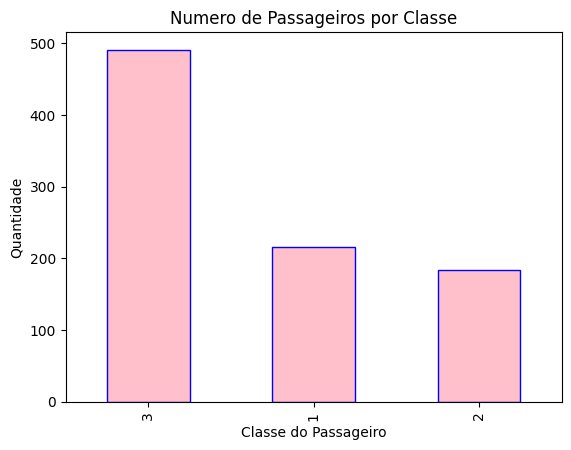

In [38]:
# Quantos passageiros estavam em cada classe no titanic?

#contagem dos numeros de passageiros
contagem_passageiros = df["Classe"].value_counts()

#criação do grafico 
contagem_passageiros.plot(kind="bar", edgecolor="blue", color="pink")

#configuraçoes 
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Numero de Passageiros por Classe")

plt.show()


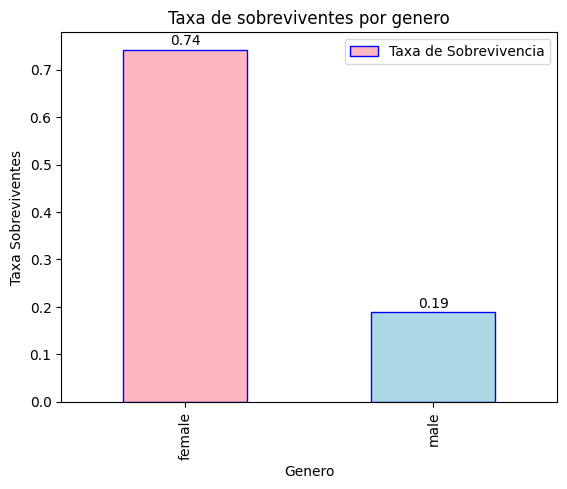

In [42]:
# Qual a taxa de sobreviventes por genero?

# argupamento de genero por sobreviventes
taxa_sob_genero = df.groupby("Genero")["Sobreviveu"].mean()

# Cores para as barras

cores = ["lightpink", "lightblue"]

# Plotagem

barras = taxa_sob_genero.plot.bar(edgecolor= "blue", color= cores)

# os rotulos
plt.xlabel("Genero")
plt.ylabel("Taxa Sobreviventes")
plt.title("Taxa de sobreviventes por genero")

# Adicionar legendas

plt.legend(["Taxa de Sobrevivencia"])

# Adicionar rotulos nos graficos

for i, v in enumerate(taxa_sob_genero): 
    barras.text(i, v + 0.01, f"{v:.2f}", color = "black", ha = "center")

plt.show()	


Distribuiçao de Idade

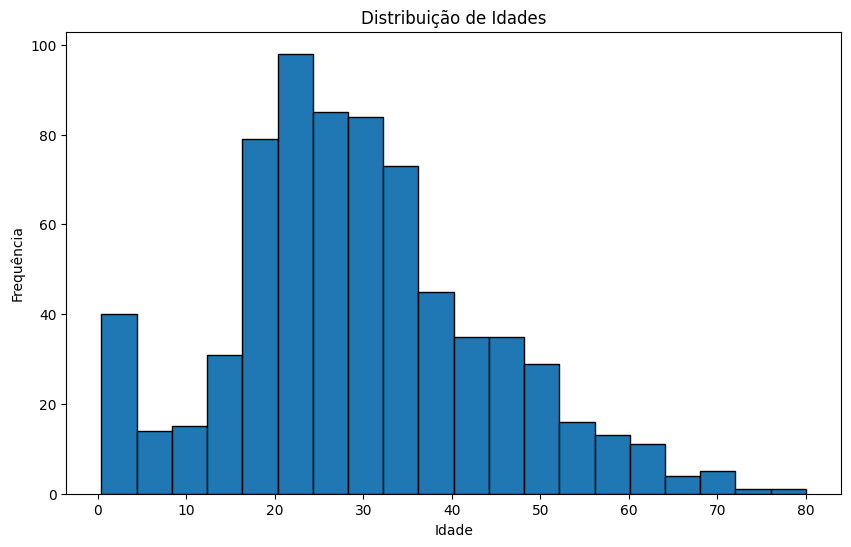

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=20, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


*Teste de Hipóteses*

# teste de classe e sobrevivencia 

# hipotese nula H0: Os sobreviventes não relacionam com a idade dos passageiros.

# hipotese alternativa H1: Sobreviventes dependem da classe dos passageiros.

In [46]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/44.5 MB 12.6 MB/s eta 0:00:04
   ------------ --------------------------- 13.6/44.5 MB 40.6 MB/s eta 0:00:01
   ----------------------- ---------------- 26.5/44.5 MB 50.8 MB/s eta 0:00:01
   ----------------------------- ---------- 32.8/44.5 MB 53.3 MB/s eta 0:00:01
   ----------------------------- ---------- 32.8/44.5 MB 53.3 MB/s eta 0:00:01
   ----------------------------- ---------- 32.8/44.5 MB 53.3 MB/s eta 0:00:01
   ----------------------------- ---------- 33.0/44.5 MB 26.9 MB/s eta 0:00:01
   ------------------------------ --------- 33.6/44.5 MB 22.0 MB/s eta 0:00:01
   ------------------------------- -------- 34.6/44.5 MB 19.4 MB/s eta 0:00:01
   -------------------------------- ------- 36.4/44.5 MB 18.4 MB/s eta 0:00:01
   --------------------------------- ------ 37.2/44.5 MB 17.4 M

In [50]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from scipy.stats import ttest_ind
import seaborn as sns


Teste T de idade
Estatística T : -2.06668694625381
Valor P: 0.03912465401348249


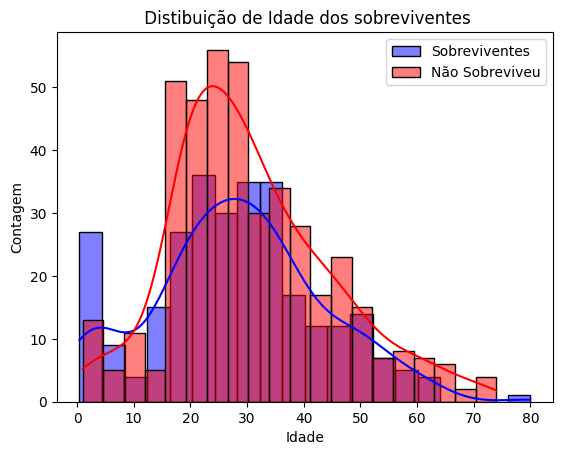

Rejeitamos a hipótese nula


In [54]:
#amostras
idade_sobriventes = df[df['Sobreviveu']== 1]['Idade'].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()
# Teste t
estatistica_t, valor_p = ttest_ind(idade_sobriventes, idade_nao_sobreviveu)
print("Teste T de idade")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")
#grafico
sns.histplot(idade_sobriventes, color= 'blue', label ='Sobreviventes', kde=True, bins= 20)
sns.histplot(idade_nao_sobreviveu, color = 'red', label = 'Não Sobreviveu', kde=True, bins= 20)
#rotulos
plt.legend()
plt.title(" Distibuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()
#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

In [60]:
#amostra e SQL
baby_df = df.sample(100)

In [59]:
baby_df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,2683,6.4375,NaN,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,364500,7.2500,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,6563,9.2250,NaN,S


In [61]:
import sqlite3

In [65]:
# Conexão 

conn = sqlite3.connect(":memory:")

# Escrever o df em um Sql 

baby_df.to_sql("baby_df", conn, index=False, if_exists="replace")

# Executar a consulta

query_sql= """
SELECT genero, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Genero;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)

#fechar a conexão
conn.close()

   Genero  Contagem
0  female        33
1    male        67


In [66]:
#pandas
contagem_por_genero = baby_df['Genero'].value_counts().reset_index()
contagem_por_genero.columns = ['Genero', 'Contagem']
print(contagem_por_genero)

   Genero  Contagem
0    male        67
1  female        33
